Baseline and Plots on Distribution

In [1]:
import pandas as pd
from IPython.display import display

# Load the parquet files
driver_order_mapping = pd.read_parquet('Flaschenpost_Datathon_2025_Dataset 1/masked_driver_order_mapping.parquet')
order_articles = pd.read_parquet('Flaschenpost_Datathon_2025_Dataset 1/masked_order_articles.parquet')
orders = pd.read_parquet('Flaschenpost_Datathon_2025_Dataset 1/masked_orders.parquet')
service_times = pd.read_parquet('Flaschenpost_Datathon_2025_Dataset 1/masked_service_times.parquet')

# Display the first few rows of each dataframe to verify the data
display(driver_order_mapping.head())
display(order_articles.head())
display(orders.head())
display(service_times.head())

,web_order_id,driver_id
0,51222,182
1,53503,182
2,166709,182
3,136190,182
4,176394,182


,warehouse_id,box_id,article_id,article_weight_in_g,web_order_id
0,3,NaN,3657,17250,1250399
1,3,NaN,3657,17250,1250154
2,32,NaN,2576,17000,1296951
3,32,NaN,3975,15100,978668
4,25,NaN,3670,11000,104995


,warehouse_id,order_time,has_elevator,floor,is_pre_order,is_business,web_order_id,customer_id
0,18,2024-12-17 09:00:00+01:00,False,0.0,True,True,806432,166859
1,8,2024-12-10 09:45:00+01:00,False,0.0,True,True,678738,167463
2,8,2024-11-21 10:45:00+01:00,False,NaN,True,True,347665,49336
3,13,2024-11-08 10:00:00+01:00,False,0.0,True,True,110643,172552
4,13,2025-01-06 13:15:48.730000+01:00,False,NaN,False,True,1139043,136281


,service_time_start,service_time_end,service_time_in_minutes,order_datetime,web_order_id,driver_id,trip_id,customer_id
0,2024-11-11 21:48:59+01:00,2024-11-11 21:57:56+01:00,8.950000,2024-11-11 20:45:00+01:00,1,3621,29687,35422
1,2024-11-05 13:27:30+01:00,2024-11-05 13:45:05+01:00,17.583333,2024-11-05 13:15:00+01:00,2,6575,10097,159165
2,2024-11-05 21:52:03+01:00,2024-11-05 22:09:28+01:00,17.416666,2024-11-05 20:00:00+01:00,3,6811,12316,377355
3,2024-11-12 21:01:30.013000+01:00,2024-11-12 21:15:30.087000+01:00,14.000000,2024-11-12 19:00:00+01:00,4,5183,31795,146455
4,2024-11-01 15:28:07+01:00,2024-11-01 15:37:01+01:00,8.900000,2024-11-01 13:45:00+01:00,5,694,966,210296


In [2]:
# Merge all dataframes on 'web_order_id'
merged_df = driver_order_mapping.merge(order_articles, on='web_order_id') \
                                .merge(orders, on='web_order_id') \
                                .merge(service_times, on='web_order_id')

# Display the first few rows of the merged dataframe to verify
display(merged_df.head())

,web_order_id,driver_id_x,warehouse_id_x,box_id,article_id,article_weight_in_g,warehouse_id_y,order_time,has_elevator,floor,is_pre_order,is_business,customer_id_x,service_time_start,service_time_end,service_time_in_minutes,order_datetime,driver_id_y,trip_id,customer_id_y
0,51222,182,27,NaN,1798,15100,27,2024-11-04 09:31:03.577000+01:00,False,0.0,False,True,523043,2024-11-04 10:40:36+01:00,2024-11-04 11:03:10+01:00,22.566666,2024-11-04 09:31:03.577000+01:00,182,6296,523043
1,51222,182,27,NaN,1798,15100,27,2024-11-04 09:31:03.577000+01:00,False,0.0,False,True,523043,2024-11-04 10:40:36+01:00,2024-11-04 11:03:10+01:00,22.566666,2024-11-04 09:31:03.577000+01:00,182,6296,523043
2,51222,182,27,NaN,1798,15100,27,2024-11-04 09:31:03.577000+01:00,False,0.0,False,True,523043,2024-11-04 10:40:36+01:00,2024-11-04 11:03:10+01:00,22.566666,2024-11-04 09:31:03.577000+01:00,182,6296,523043
3,51222,182,27,NaN,1798,15100,27,2024-11-04 09:31:03.577000+01:00,False,0.0,False,True,523043,2024-11-04 10:40:36+01:00,2024-11-04 11:03:10+01:00,22.566666,2024-11-04 09:31:03.577000+01:00,182,6296,523043
4,51222,182,27,NaN,1798,15100,27,2024-11-04 09:31:03.577000+01:00,False,0.0,False,True,523043,2024-11-04 10:40:36+01:00,2024-11-04 11:03:10+01:00,22.566666,2024-11-04 09:31:03.577000+01:00,182,6296,523043


In [3]:
# Drop columns that end with '_y'
merged_df = merged_df.loc[:, ~merged_df.columns.str.endswith('_y')]

# Rename columns that end with '_x' to remove the suffix
merged_df.columns = merged_df.columns.str.replace('_x', '')

# Display the first few rows of the cleaned dataframe to verify
display(merged_df.head())

,web_order_id,driver_id,warehouse_id,box_id,article_id,article_weight_in_g,order_time,has_elevator,floor,is_pre_order,is_business,customer_id,service_time_start,service_time_end,service_time_in_minutes,order_datetime,trip_id
0,51222,182,27,NaN,1798,15100,2024-11-04 09:31:03.577000+01:00,False,0.0,False,True,523043,2024-11-04 10:40:36+01:00,2024-11-04 11:03:10+01:00,22.566666,2024-11-04 09:31:03.577000+01:00,6296
1,51222,182,27,NaN,1798,15100,2024-11-04 09:31:03.577000+01:00,False,0.0,False,True,523043,2024-11-04 10:40:36+01:00,2024-11-04 11:03:10+01:00,22.566666,2024-11-04 09:31:03.577000+01:00,6296
2,51222,182,27,NaN,1798,15100,2024-11-04 09:31:03.577000+01:00,False,0.0,False,True,523043,2024-11-04 10:40:36+01:00,2024-11-04 11:03:10+01:00,22.566666,2024-11-04 09:31:03.577000+01:00,6296
3,51222,182,27,NaN,1798,15100,2024-11-04 09:31:03.577000+01:00,False,0.0,False,True,523043,2024-11-04 10:40:36+01:00,2024-11-04 11:03:10+01:00,22.566666,2024-11-04 09:31:03.577000+01:00,6296
4,51222,182,27,NaN,1798,15100,2024-11-04 09:31:03.577000+01:00,False,0.0,False,True,523043,2024-11-04 10:40:36+01:00,2024-11-04 11:03:10+01:00,22.566666,2024-11-04 09:31:03.577000+01:00,6296


In [4]:
# Check for non-null entries in the 'box_id' column
box_id_entries = merged_df['box_id'].notnull().sum()

# Display the result
print(f"Number of non-null entries in 'box_id': {box_id_entries}")

Number of non-null entries in 'box_id': 8090551


In [5]:
# Find the smallest box_id
smallest_box_id = 24510740

# Filter the dataframe for the smallest box_id
smallest_box_df = merged_df[merged_df['box_id'] == smallest_box_id]

# Print the rows of the filtered dataframe
print(smallest_box_df)

          web_order_id  driver_id  warehouse_id      box_id  article_id  \
14397497        754862        681            22  24510740.0        8484   
14397498        754862        681            22  24510740.0       22384   
14397499        754862        681            22  24510740.0       22384   
14397500        754862        681            22  24510740.0       23122   
14397501        754862        681            22  24510740.0       22813   
14397502        754862        681            22  24510740.0       23122   
14397503        754862        681            22  24510740.0        8790   
14397504        754862        681            22  24510740.0        8790   
14397505        754862        681            22  24510740.0        8484   

          article_weight_in_g                       order_time  has_elevator  \
14397497                  163 2024-12-13 10:34:43.860000+01:00         False   
14397498                  450 2024-12-13 10:34:43.860000+01:00         False   
14397499 

In [6]:
# Calculate the sum of article weights for each web_order_id
merged_df['total_article_weight_in_g'] = merged_df.groupby('web_order_id')['article_weight_in_g'].transform('sum')

# Display the first few rows of the updated dataframe to verify
display(merged_df.head())

,web_order_id,driver_id,warehouse_id,box_id,article_id,article_weight_in_g,order_time,has_elevator,floor,is_pre_order,is_business,customer_id,service_time_start,service_time_end,service_time_in_minutes,order_datetime,trip_id,total_article_weight_in_g
0,51222,182,27,NaN,1798,15100,2024-11-04 09:31:03.577000+01:00,False,0.0,False,True,523043,2024-11-04 10:40:36+01:00,2024-11-04 11:03:10+01:00,22.566666,2024-11-04 09:31:03.577000+01:00,6296,226500
1,51222,182,27,NaN,1798,15100,2024-11-04 09:31:03.577000+01:00,False,0.0,False,True,523043,2024-11-04 10:40:36+01:00,2024-11-04 11:03:10+01:00,22.566666,2024-11-04 09:31:03.577000+01:00,6296,226500
2,51222,182,27,NaN,1798,15100,2024-11-04 09:31:03.577000+01:00,False,0.0,False,True,523043,2024-11-04 10:40:36+01:00,2024-11-04 11:03:10+01:00,22.566666,2024-11-04 09:31:03.577000+01:00,6296,226500
3,51222,182,27,NaN,1798,15100,2024-11-04 09:31:03.577000+01:00,False,0.0,False,True,523043,2024-11-04 10:40:36+01:00,2024-11-04 11:03:10+01:00,22.566666,2024-11-04 09:31:03.577000+01:00,6296,226500
4,51222,182,27,NaN,1798,15100,2024-11-04 09:31:03.577000+01:00,False,0.0,False,True,523043,2024-11-04 10:40:36+01:00,2024-11-04 11:03:10+01:00,22.566666,2024-11-04 09:31:03.577000+01:00,6296,226500


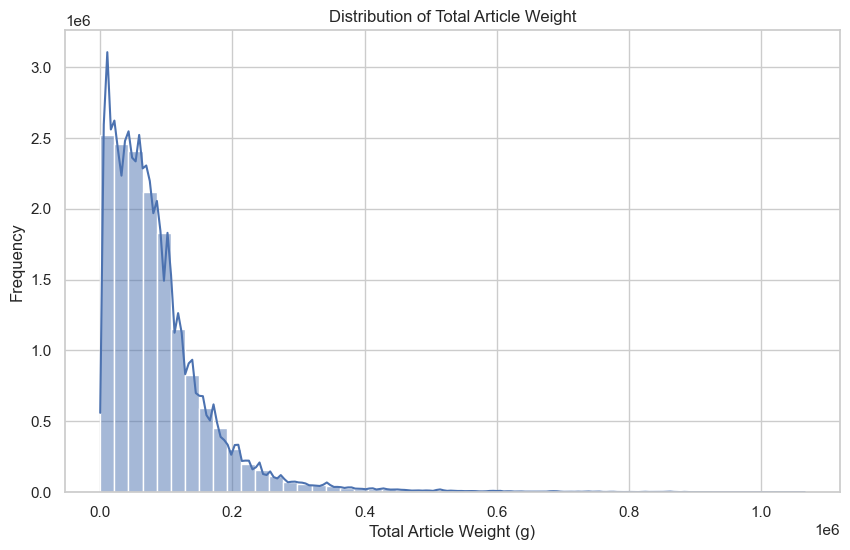

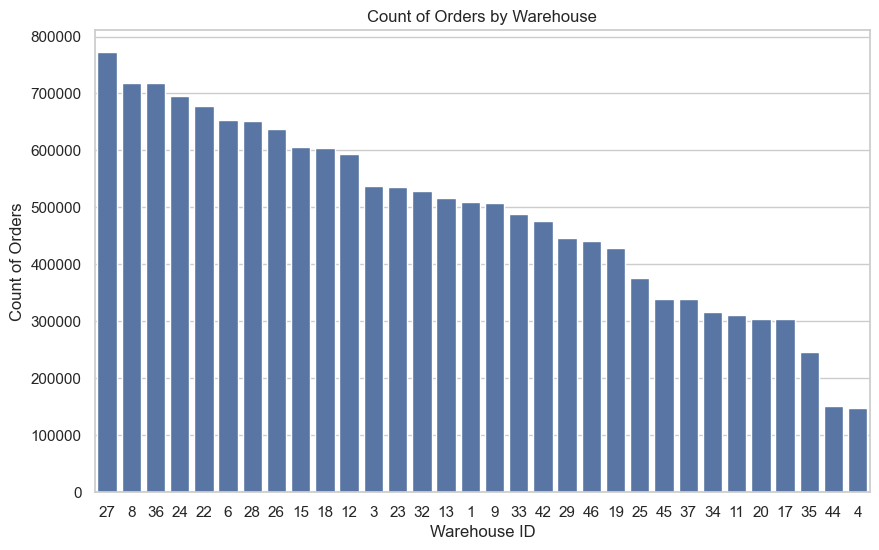

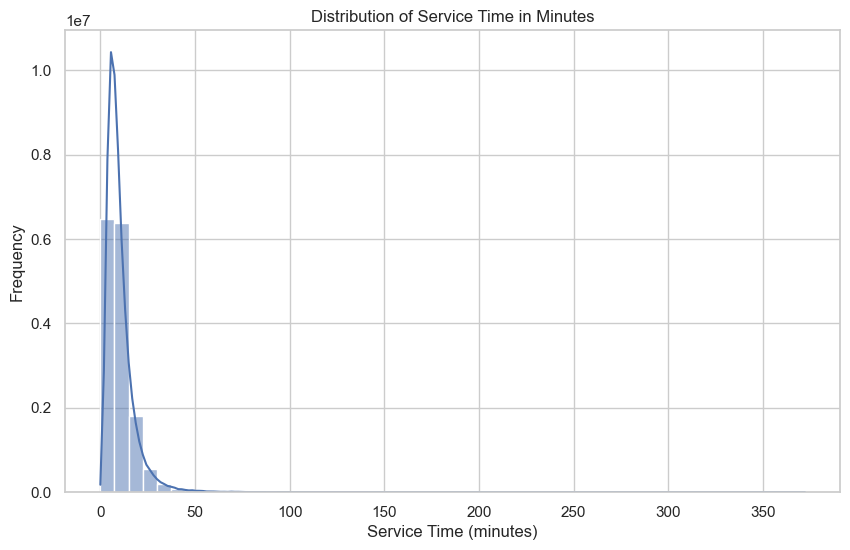

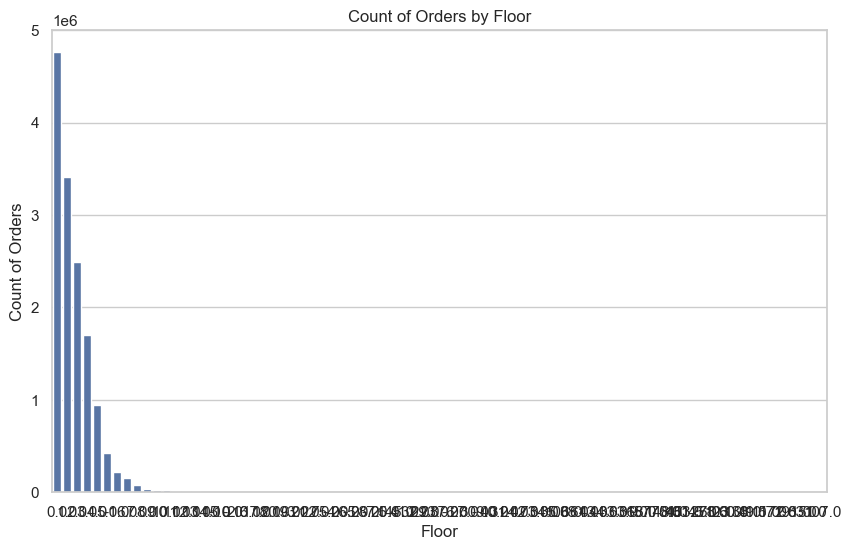

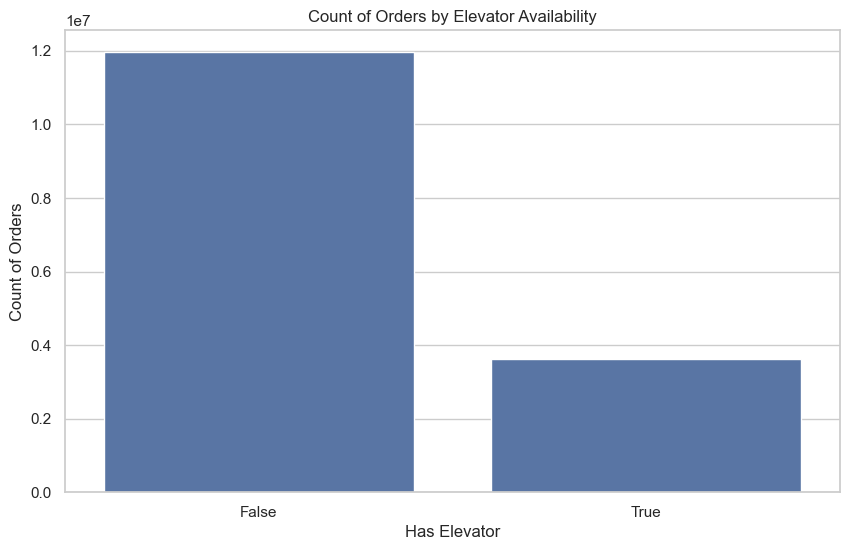

In [7]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set the style of the plots
sns.set(style="whitegrid")

# Plot the distribution of total article weight
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['total_article_weight_in_g'], bins=50, kde=True)
plt.title('Distribution of Total Article Weight')
plt.xlabel('Total Article Weight (g)')
plt.ylabel('Frequency')
plt.show()

# Plot the count of orders by warehouse
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='warehouse_id', order=merged_df['warehouse_id'].value_counts().index)
plt.title('Count of Orders by Warehouse')
plt.xlabel('Warehouse ID')
plt.ylabel('Count of Orders')
plt.show()

# Plot the distribution of service time in minutes
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['service_time_in_minutes'], bins=50, kde=True)
plt.title('Distribution of Service Time in Minutes')
plt.xlabel('Service Time (minutes)')
plt.ylabel('Frequency')
plt.show()

# Plot the count of orders by floor
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='floor', order=merged_df['floor'].value_counts().index)
plt.title('Count of Orders by Floor')
plt.xlabel('Floor')
plt.ylabel('Count of Orders')
plt.show()

# Plot the count of orders by whether they have an elevator
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='has_elevator')
plt.title('Count of Orders by Elevator Availability')
plt.xlabel('Has Elevator')
plt.ylabel('Count of Orders')
plt.show()

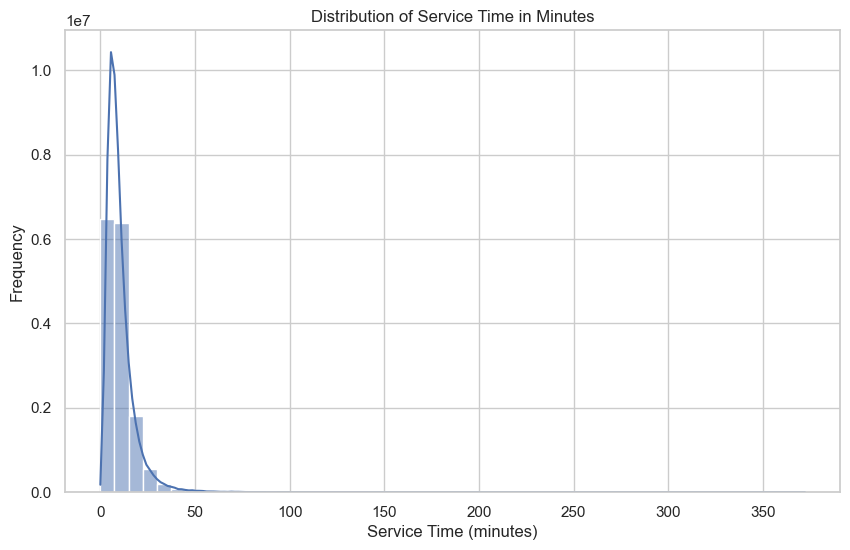

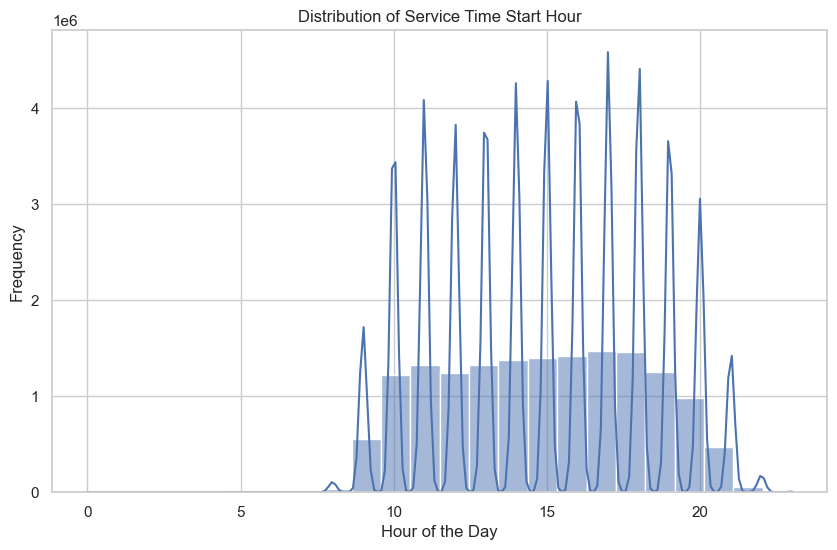

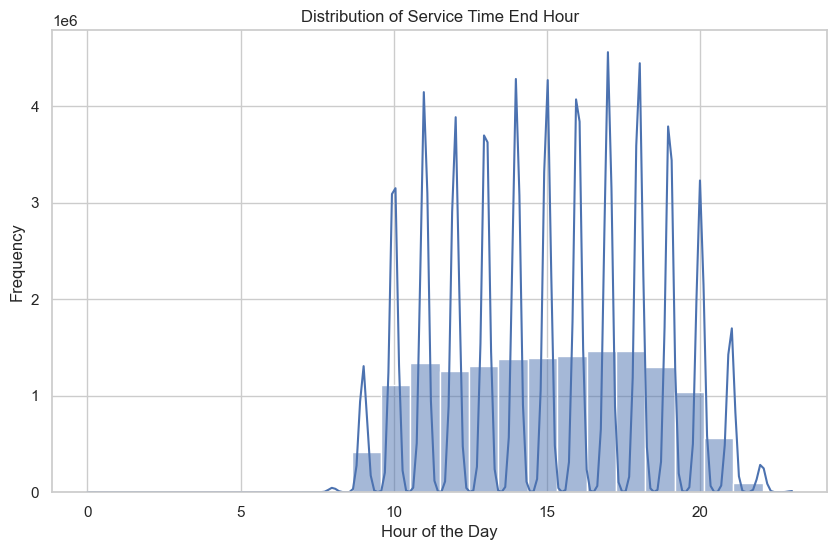

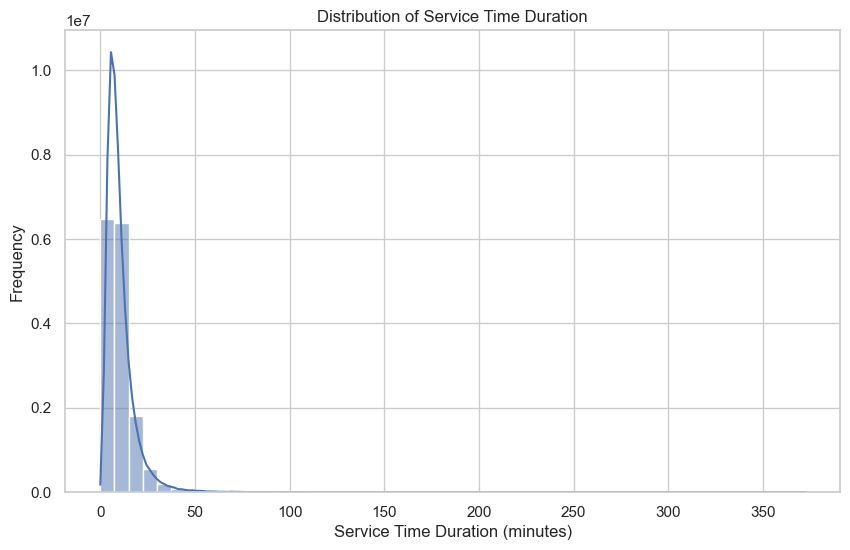

In [8]:
# Plot the distribution of service time in minutes
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['service_time_in_minutes'], bins=50, kde=True)
plt.title('Distribution of Service Time in Minutes')
plt.xlabel('Service Time (minutes)')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of service time start
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['service_time_start'].dt.hour, bins=24, kde=True)
plt.title('Distribution of Service Time Start Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of service time end
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['service_time_end'].dt.hour, bins=24, kde=True)
plt.title('Distribution of Service Time End Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of service time duration
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['service_time_in_minutes'], bins=50, kde=True)
plt.title('Distribution of Service Time Duration')
plt.xlabel('Service Time Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

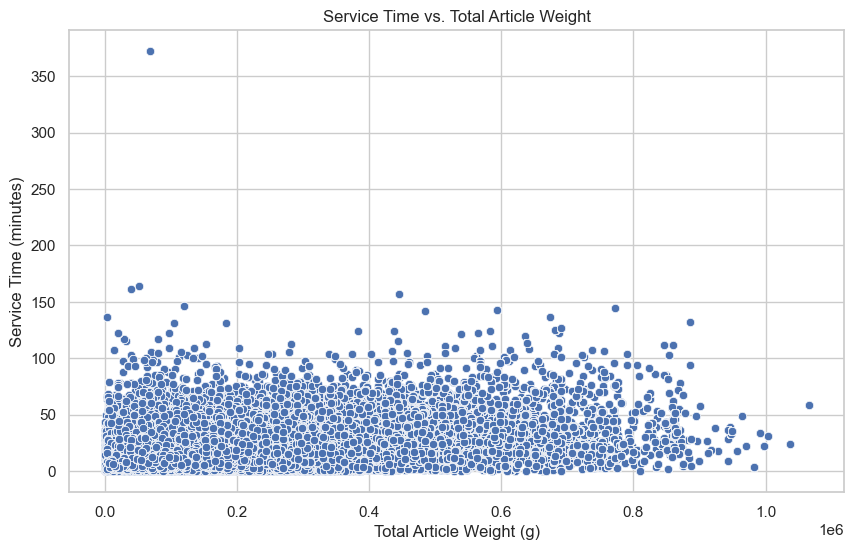

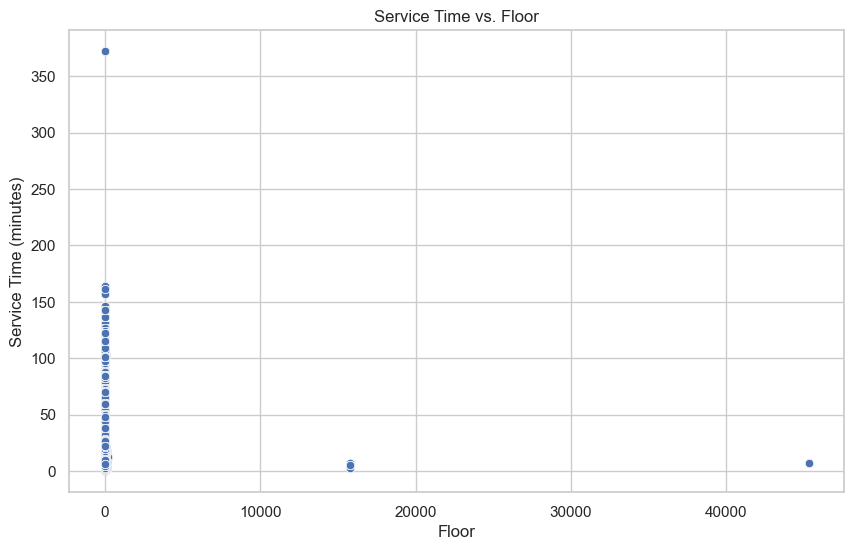

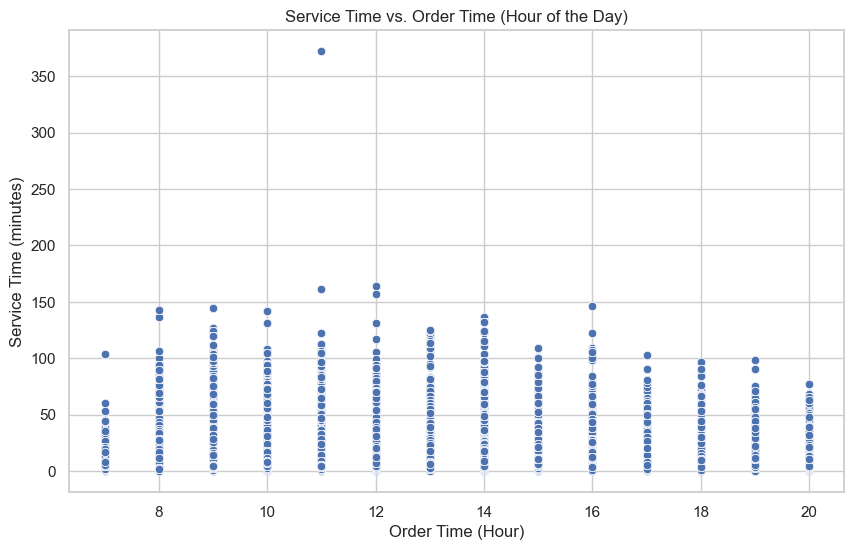

In [9]:
# Scatter plot of service time vs. total article weight
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='total_article_weight_in_g', y='service_time_in_minutes')
plt.title('Service Time vs. Total Article Weight')
plt.xlabel('Total Article Weight (g)')
plt.ylabel('Service Time (minutes)')
plt.show()

# Scatter plot of service time vs. floor
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='floor', y='service_time_in_minutes')
plt.title('Service Time vs. Floor')
plt.xlabel('Floor')
plt.ylabel('Service Time (minutes)')
plt.show()

# Scatter plot of service time vs. order time (hour of the day)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x=merged_df['order_time'].dt.hour, y='service_time_in_minutes')
plt.title('Service Time vs. Order Time (Hour of the Day)')
plt.xlabel('Order Time (Hour)')
plt.ylabel('Service Time (minutes)')
plt.show()

In [ ]:
plot the service time 